# ML Lab 04 Solutions

## Utility functions

Some utility functions used below.

### Stats

In [1]:
from sklearn import metrics

def print_stats(n_clusters, n_noise, X, y, y_pred):
    print('Estimated number of clusters: %d' % n_clusters)
    print('Estimated number of noise points: %d' % n_noise)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y, y_pred))
    
    # and some extra metrics not explicitly mentioned in the lab tasks
    print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, y_pred))
    print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y, y_pred))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_pred))

### Plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cluster_graph(X, y_pred, core_samples_mask, algorithm_name, n_clusters, cluster_centres=None):
    
    plt.rcParams.update({'font.size': 12, 'figure.figsize': (12, 9)}) # set font and plot size to be larger

    unique_labels = set(y_pred)

    colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [1, 1, 1, 1] # white for noise

        class_member_mask = (y_pred == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    # plots centroids, if provided
    if cluster_centres is not None:
        plt.plot(cluster_centres[:,0], cluster_centres[:,1], 'o', mew=10, ms=20, alpha=0.5)
    
    plt.title('%s with %d clusters' % (algorithm_name, n_clusters))
    plt.show()

## Blobs analsyis

### Dataset import

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers_matrix = [[1, 1], [-1, -1], [1, -1]]
X_blobs, y_blobs = make_blobs(n_samples=750, centers=centers_matrix, cluster_std=0.4, random_state=0)

# Standardise features by removing the mean and scaling to unit variance
X_blobs = StandardScaler().fit_transform(X_blobs)

print(X_blobs)

[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ...
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]


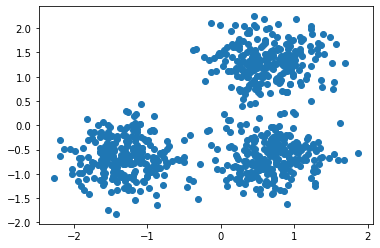

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.show()

### k-means

Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650


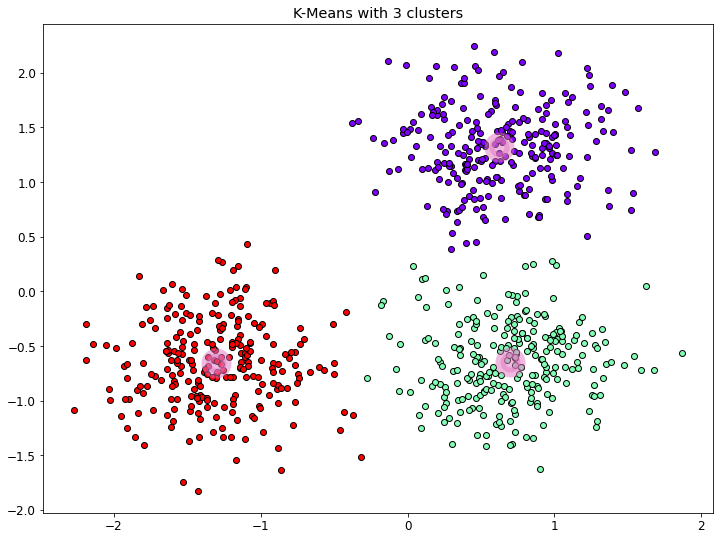

In [5]:
import numpy as np
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model = model.fit(X_blobs)
labels = model.labels_
cluster_centres = model.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just an Numpy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# Print stats and plot graph
print_stats(n_clusters_, n_noise_, X_blobs, y_blobs, labels)
plot_cluster_graph(X_blobs, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

### DBSCAN

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


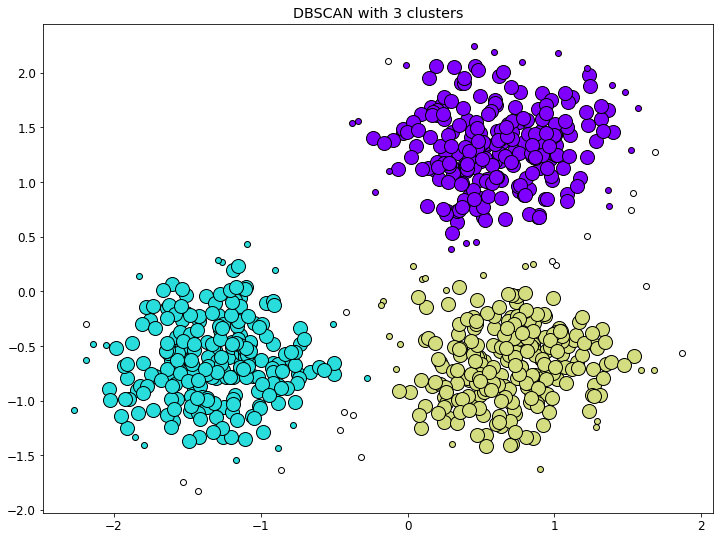

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10)
model = model.fit(X_blobs)
labels = model.labels_


# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - First creates a NumPy array of False entries
# - Then sets the entries for the core instances to True
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True

print_stats(n_clusters_, n_noise_, X_blobs, y_blobs, labels)
plot_cluster_graph(X_blobs, labels, core_samples_mask, 'DBSCAN', n_clusters_)

## Circle data analysis

### Dataset

In [7]:
from sklearn import datasets

noisy_circles = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)
X_circles = noisy_circles[0]
y_circles = noisy_circles[1]

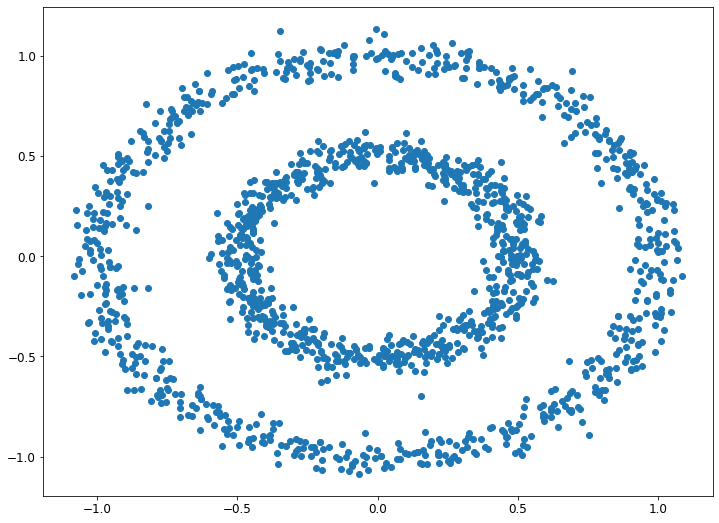

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_circles[:,0], X_circles[:,1])

### K-Means

Estimated number of clusters: 12
Estimated number of noise points: 0
Homogeneity: 0.995
Completeness: 0.279
V-measure: 0.436
Adjusted Rand Index: 0.170
Adjusted Mutual Information: 0.435
Silhouette Coefficient: 0.462


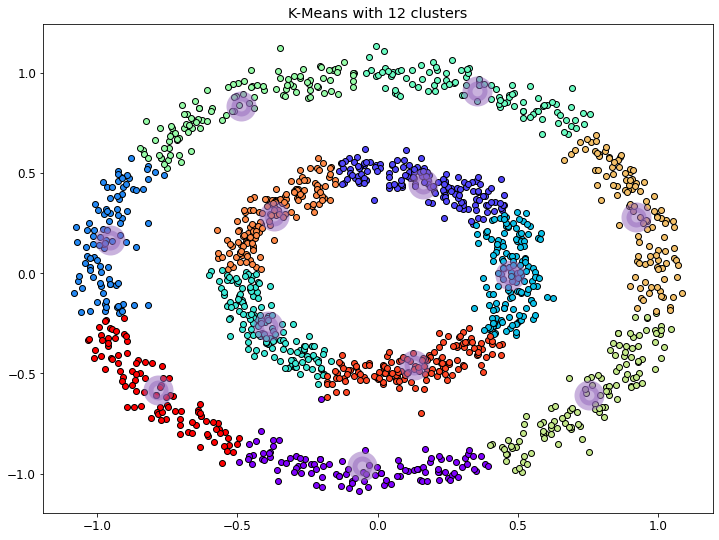

In [9]:
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12)
kmeans = kmeans.fit(X_circles)
labels = kmeans.labels_
cluster_centres = kmeans.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just an Numpy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# Print stats and plot graph
print_stats(n_clusters_, n_noise_, X_circles, y_circles, labels)
plot_cluster_graph(X_circles, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

### DBSCAN

[0 0 1 ... 1 1 0]
Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.999
Completeness: 0.986
V-measure: 0.992
Adjusted Rand Index: 0.997
Adjusted Mutual Information: 0.992
Silhouette Coefficient: 0.093


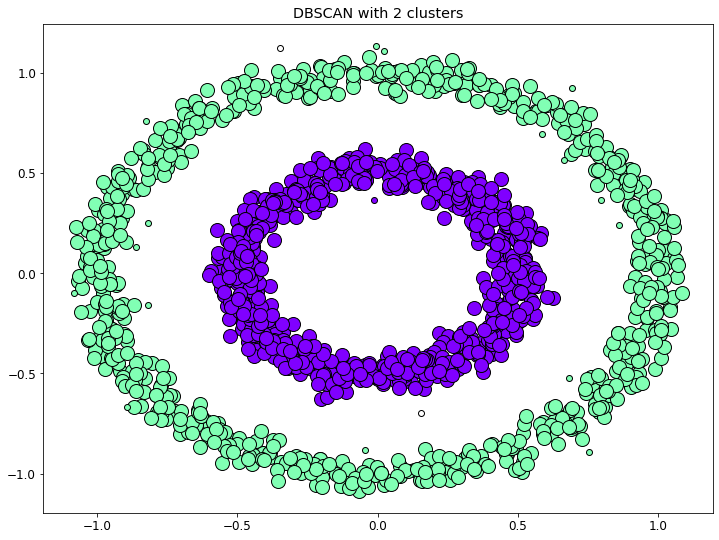

In [10]:
import numpy as np
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=7).fit(X_circles)
labels = db.labels_

import pprint as pprint
print(labels)

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - First creates a NumPy array of False entries
# - Then sets the entries for the core instances to True
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

print_stats(n_clusters_, n_noise_, X_circles, y_circles, labels)
plot_cluster_graph(X_circles, labels, core_samples_mask, 'DBSCAN', n_clusters_)

## Clustering on the Iris dataset

An example of something you could do for the assignment dataset.

### Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

# load the iris.arff data set
data = arff.loadarff('data/iris.arff')
iris_df = pd.DataFrame(data[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8') # fixes byte strings, avoiding strings like b'Iris-versicolor'

# print the top of the file (just to check it's read and processed OK)
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### k-means

#### Sepal length and width

To start with, simplifying this by using only 2 dimensions (features).

In [12]:
from sklearn.preprocessing import StandardScaler

X_iris = iris_df[["sepallength", "sepalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)

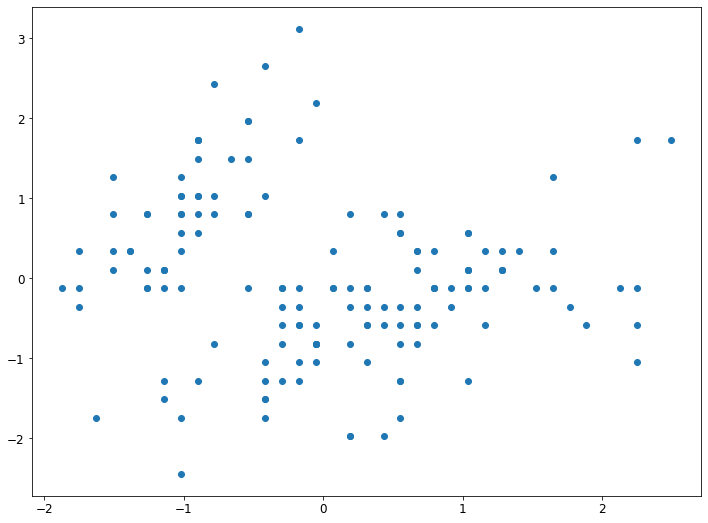

In [13]:
plt.figure()
plt.scatter(X_iris[:,0], X_iris[:,1])
plt.show()

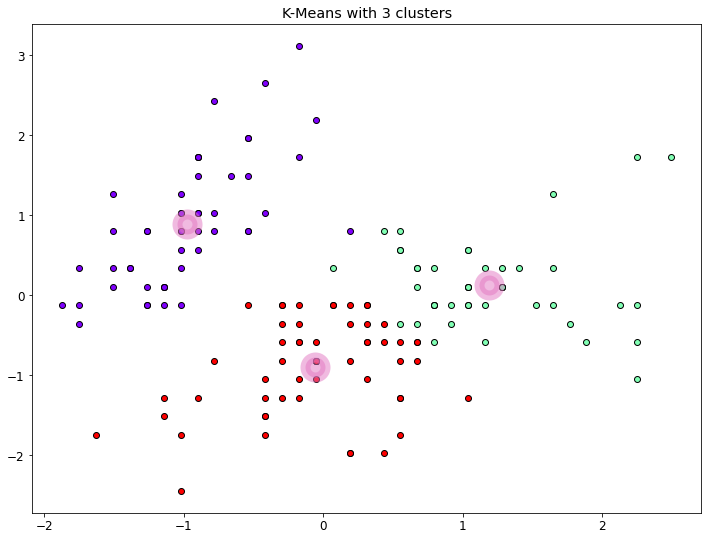

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X_iris)
labels = kmeans.labels_
cluster_centres = kmeans.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just a NumPy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# Visualising the clusters
plot_cluster_graph(X_iris, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

#### All features

Note where the centroids end up, when doing it based on all features, but visualising the same two dimensions as above!

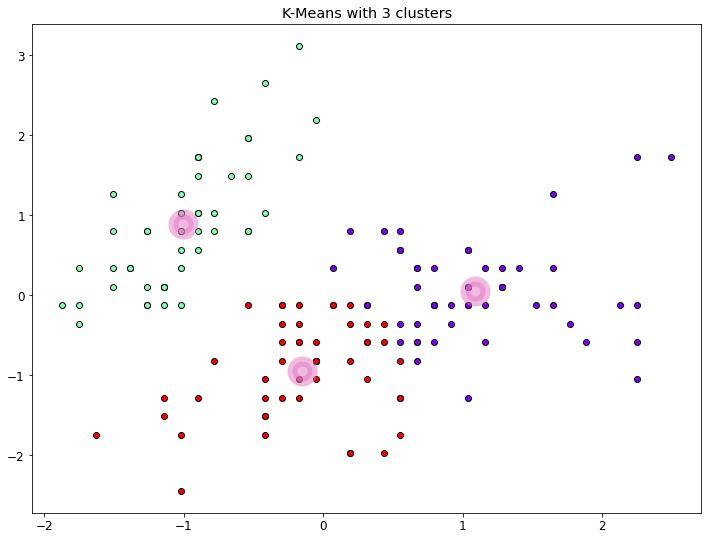

In [15]:
# Slices the Pandas DataFrame to get the entire feature matrix (X)
X_iris = iris_df.iloc[:,:len(iris_df.columns)-2]
X_iris = StandardScaler().fit_transform(X_iris)

# Perform clustering
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X_iris)
labels = kmeans.labels_
cluster_centres = kmeans.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just an Numpy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# Visualising the results for the same two features used above
X_iris = iris_df[["sepallength", "sepalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)
plot_cluster_graph(X_iris, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

### DBSCAN for noise detection

Here's an example for how DBSCAN can be used for noise detection.

First with 2 features, and then with all features.

#### Sepal length and width

Estimated number of clusters: 1
Estimated number of noise points: 2


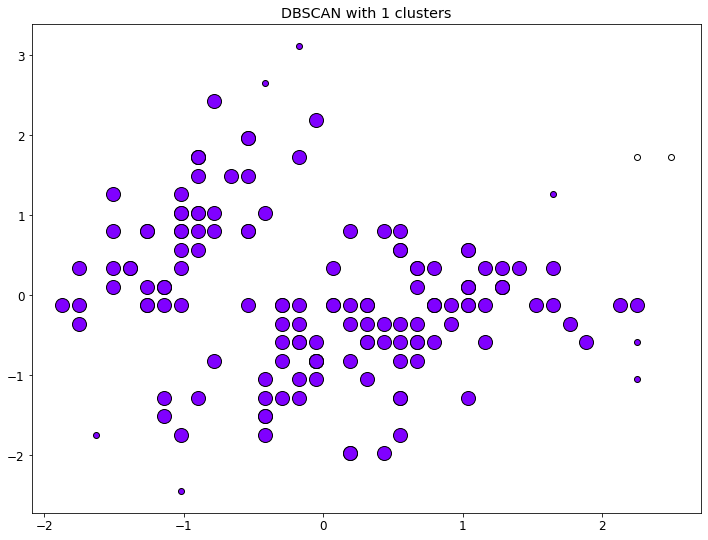

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X_iris = iris_df[["sepallength", "sepalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)

db = DBSCAN(eps=1, min_samples=10).fit(X_iris)
labels = db.labels_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - First creates a NumPy array of False entries
# - Then sets the entries for the core instances to True
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Printing some stats
# can't do all stats as above, as we don't have a ground truth of what clusters 
# each data point should belong to as in the test data
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plotting the clustering outputs
plot_cluster_graph(X_iris, labels, core_samples_mask, 'DBSCAN', n_clusters_)

#### All features

Note differences in potential noise when using all features, but visualising the same two dimensions as above!

In [17]:
# Slices the Pandas DataFrame to get the entire feature matrix (X)
X_iris = iris_df.iloc[:,:len(iris_df.columns)-2]
X_iris = StandardScaler().fit_transform(X_iris)

db = DBSCAN(eps=1, min_samples=10).fit(X_iris)
labels = db.labels_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - First creates a NumPy array of False entries
# - Then sets the entries for the core instances to True
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Printing some stats
# can't do all stats as above, as we don't have a ground truth of what clusters 
# each data point should belong to as in the test data
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 3


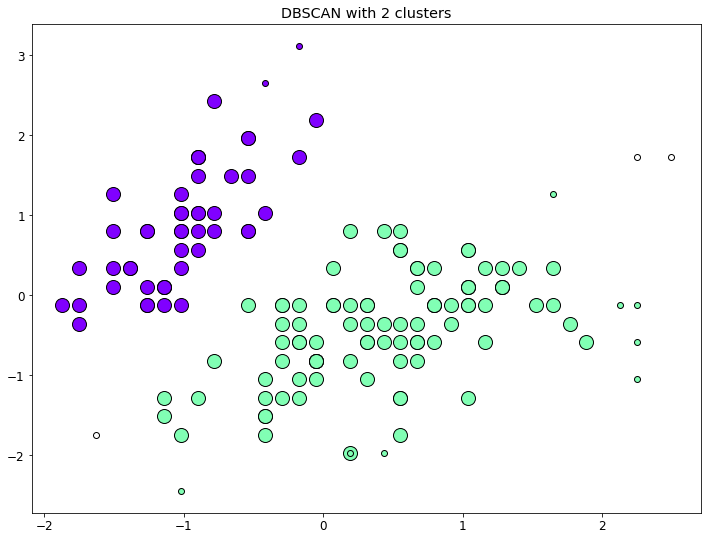

In [18]:
# Visualising the results for the same two features used above
X_iris = iris_df[["sepallength", "sepalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)

# Plotting the clustering outputs
plot_cluster_graph(X_iris, labels, core_samples_mask, 'DBSCAN', n_clusters_)

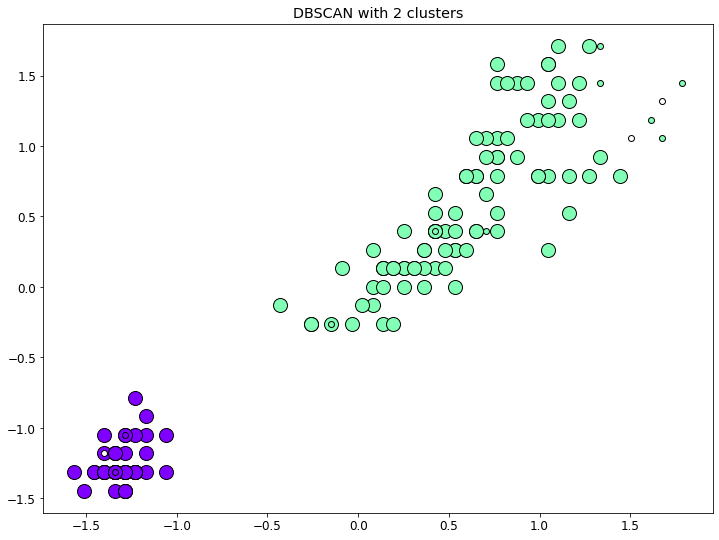

In [19]:
# Visualising the results for the petal length and width features
X_iris = iris_df[["petallength", "petalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)

# Plotting the clustering outputs
plot_cluster_graph(X_iris, labels, core_samples_mask, 'DBSCAN', n_clusters_)

In [20]:
# Add a column to our Pandas DataFrame with default values False
iris_df['NOISY'] = False

# Print which instances were noisy,
# and set flag in our new column to True for the noisy instances
print("Noisy instances / rows")
for i in range(labels.size):
    if labels[i] == -1:
        print("\t", i)
        iris_df.at[i, 'NOISY'] = True

# print out rows 30-34, so you can see instance 33 noted as noisy
iris_df.iloc[30:40].head()

Noisy instances / rows
	 41
	 117
	 131


,sepallength,sepalwidth,petallength,petalwidth,class,NOISY
30,4.8,3.1,1.6,0.2,Iris-setosa,False
31,5.4,3.4,1.5,0.4,Iris-setosa,False
32,5.2,4.1,1.5,0.1,Iris-setosa,False
33,5.5,4.2,1.4,0.2,Iris-setosa,False
34,4.9,3.1,1.5,0.1,Iris-setosa,False


In [21]:
# write new dataset file to disk
iris_df.to_csv ('data/iris-noise.csv', index = False, header=True)